**<h1>Life Expectancy and Socioeconomic Factors Analysis</h1>**

**<h2>Executive Summary:</h2>**

**Research Question:** "How do various socioeconomic factors correlate with life expectancy across different countries?"

**Objective:** To investigate the relationship between various socioeconomic factors and life expectancy across different countries using the WHO Life Expectancy dataset.

**<h3>Key Findings</h3>**

**Correlation Analysis:** Identified strong correlations between life expectancy and factors such as education (Schooling), GDP, and healthcare expenditure.

**Regression Model:** Developed a multiple linear regression model that quantifies the relationship between the relevant socioeconimnc factors and life expectancy.

**Feature Importance:** Determined that education (Schooling), GDP and healthcare expenditure are the most influential predictors of life expectancy.

**Global Trends:** Observed an overall increasing trend in global average life expectancy from 2000 to 2015.

**Country Comparisons:** Identified significant disparities in life expectancy between top-performing countries (e.g., Japan, Switzerland) and those with the lowest life expectancies (e.g., Nigeria, Zimbabwe).

**GDP Impact:** Revealed a strong positive relationship between GDP and life expectancy, particularly evident when comparing top and bottom-performing countries.

**<h3>Data Processing</h3>**

In [3]:
# Import librarires

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Data is available from this link https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download

This dataset was chosen due to it's high usability score and managebale number of data points

The first step of the analysis involved importing the CSV data and loading it into a pandas dataframe with the read.csv() function.

In [4]:
# Load in the dataset

df = pd.read_csv('Life Expectancy Data.csv')

The info() function was used to gain an understanding of the dataset's quality and structure, whilst the describe() function was used to produce some summary statistics of the numerical columns

In [5]:
# Initial data exploration

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

A check was conducted in order to determine the number of missing values for each of the columns in the dataset

In [6]:
# Check for missing values

df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Due to the relatively small size of the dataset, it was decided to fill missing values with the column mean, as removing them would have significantly reduced the size of the data, which could then make the results of the analysis less reliable

In [ ]:
# Fill missing values with mean of the column

for i in df.columns[df.isnull().any(axis=0)]:     
    df[i].fillna(df[i].mean(),inplace=True)

The most relevant socioeconomic factors from the data were selected and saved to a variable for later use 

In [8]:
# Select some relevant socioeconomic factors

factors = ['GDP', 'Schooling', 'Alcohol', 'percentage expenditure', ' HIV/AIDS', ' BMI ', 'Population']

**<h3> Analysis / Visuals </h3>**

The corr() function was used to create a correlation matrix for the previously mentioned factors and life expectancy

In [9]:
# Create correlation matrix

correlation_matrix = df[factors + ['Life expectancy ']].corr()

The heatmap visual from the seaborn package was used to visualise the correlation matrix, allowing for a quick and easy way of identifying the correlations between each of the factors and life expectancy

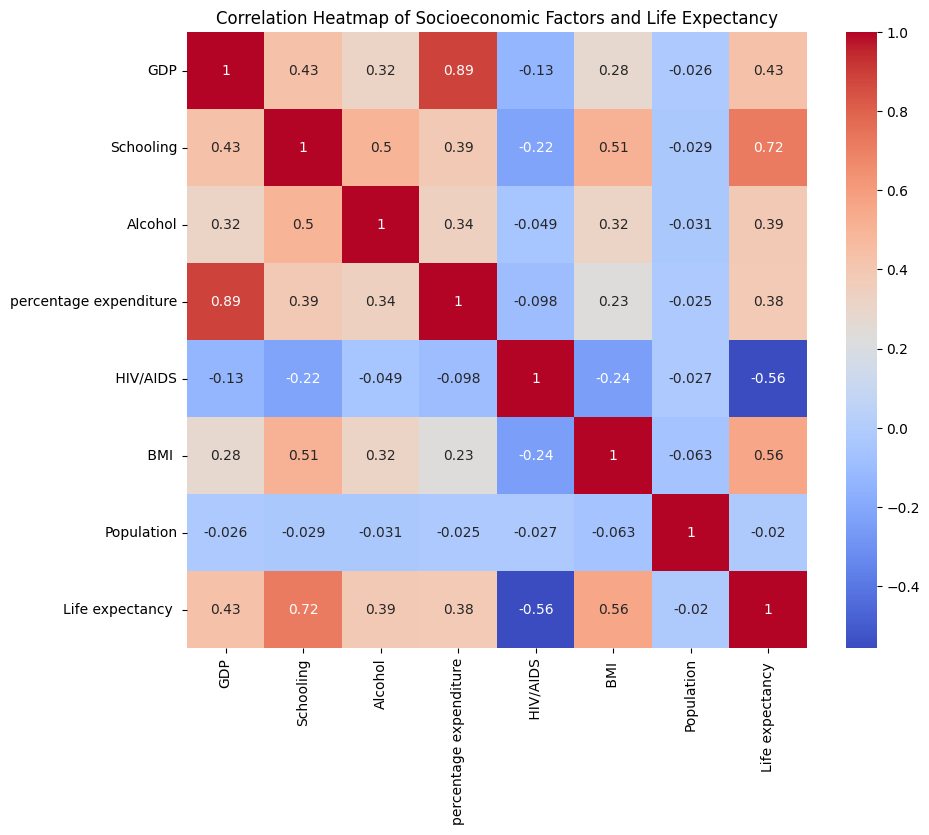

In [10]:
# Plot heatmap of correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Socioeconomic Factors and Life Expectancy')
plt.show()

In addition to the heatmap, various scatter plots were made in order to visualise the relationship between life expectancy and each factor individually. These visuals complement the heat map by allowing users to not just see the correlation (positive/negative) but also the general trend of the data in an easily digestible way.

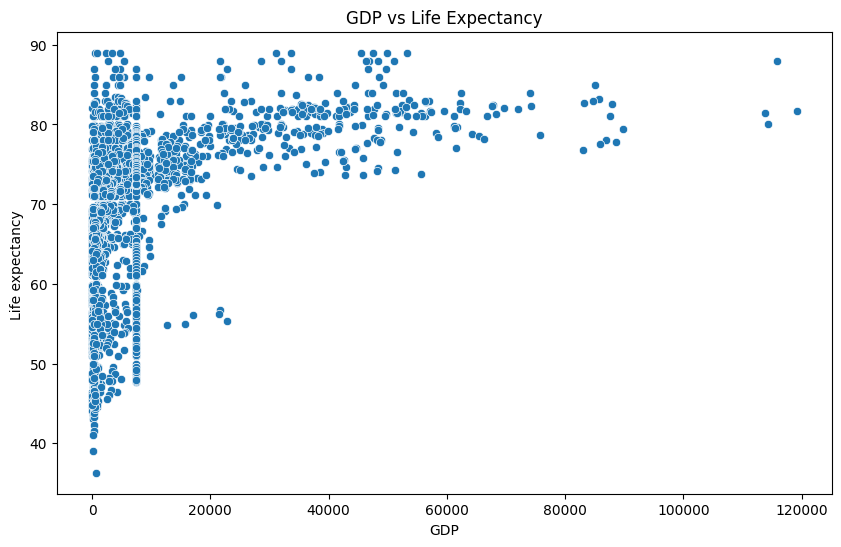

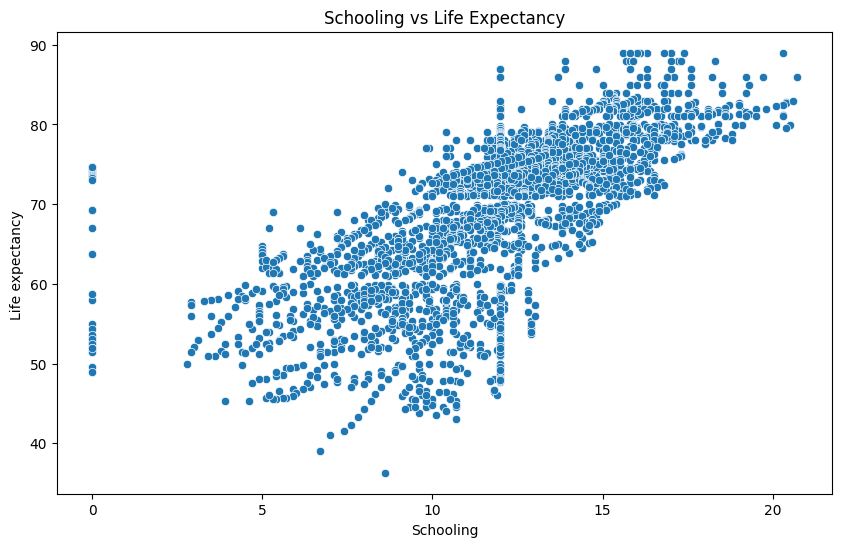

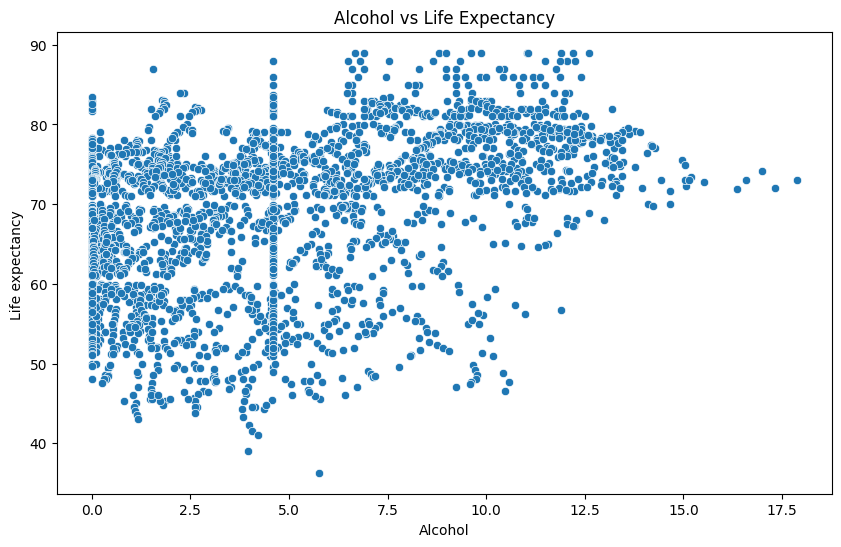

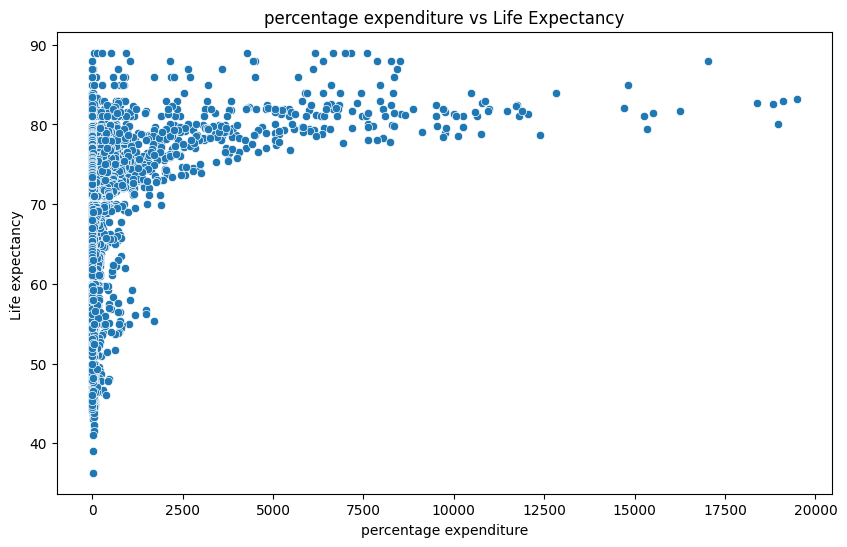

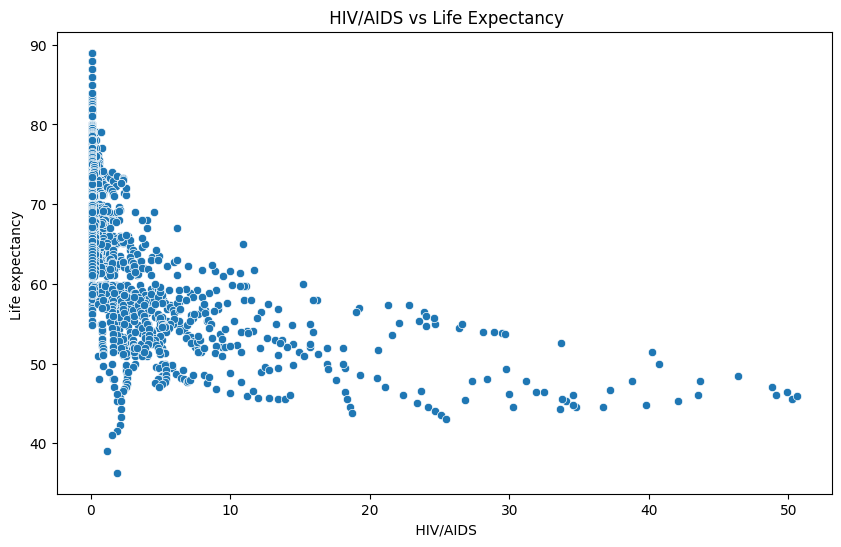

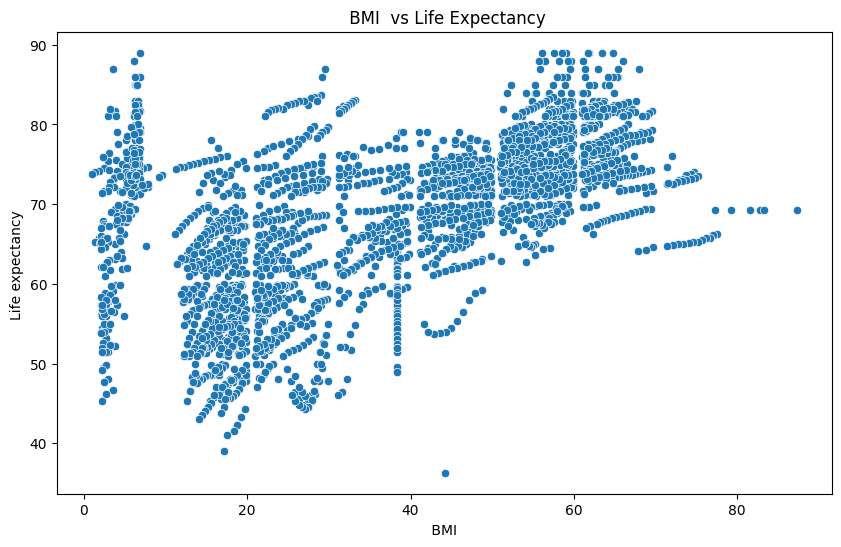

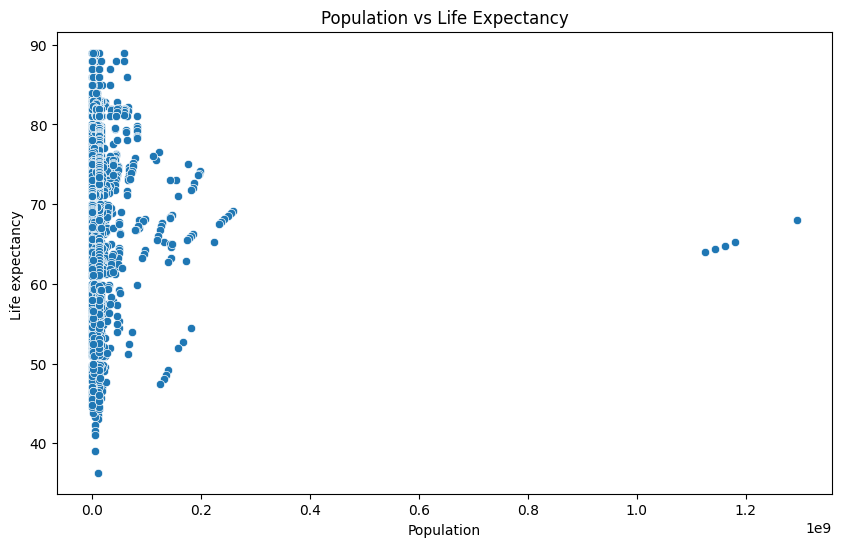

In [11]:
# Create scatter plots for each factor vs Life expectancy

for factor in factors:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=factor, y='Life expectancy ', data=df)
    plt.title(f'{factor} vs Life Expectancy')
    plt.show()

A simple linear regression model was created with the goal of quantifying the relationship between each identified factor and the target variable (life expectancy). The value for "Slope" being the most of interest

In [12]:
# Simple linear regression for each factor

for factor in factors:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[factor], df['Life expectancy '])
    print(f"\nLinear Regression Results for {factor}:")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-squared: {r_value**2:.4f}")
    print(f"P-value: {p_value:.4f}")


Linear Regression Results for GDP:
Slope: 0.0003
Intercept: 66.8934
R-squared: 0.1853
P-value: 0.0000

Linear Regression Results for Schooling:
Slope: 2.0827
Intercept: 44.2480
R-squared: 0.5113
P-value: 0.0000

Linear Regression Results for Alcohol:
Slope: 0.9507
Intercept: 64.8490
R-squared: 0.1533
P-value: 0.0000

Linear Regression Results for percentage expenditure:
Slope: 0.0018
Intercept: 67.8769
R-squared: 0.1458
P-value: 0.0000

Linear Regression Results for  HIV/AIDS:
Slope: -1.0419
Intercept: 71.0400
R-squared: 0.3096
P-value: 0.0000

Linear Regression Results for  BMI :
Slope: 0.2668
Intercept: 58.9999
R-squared: 0.3128
P-value: 0.0000

Linear Regression Results for Population:
Slope: -0.0000
Intercept: 69.2692
R-squared: 0.0004
P-value: 0.2873


<h3>Time series analysis</h3>

The data was then grouped by year and plotted on a line chart in order to see any trends in life expectancy over time

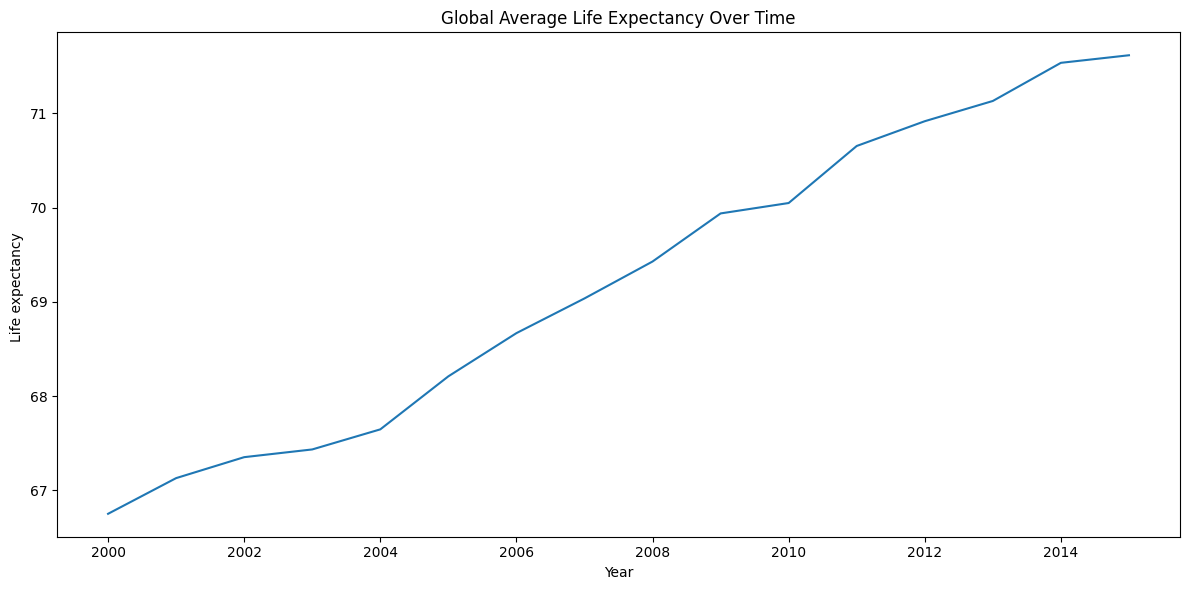

In [21]:
# Time series analysis

df_yearly = df.groupby('Year')['Life expectancy '].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life expectancy ', data=df_yearly)
plt.title('Global Average Life Expectancy Over Time')
plt.tight_layout()
plt.show()

<h3>Top/Bottom 10 Life expectancy comparison</h3>

The data was then grouped by country and mean values were calculated for each numerical column

In [22]:
# Group by country/status and calculate mean values

country_means = df.groupby(['Country', 'Status']).mean()

The mean value for life expectancy was used to rank the top and bottom 10 countries

It was noticed that countries such as France and Canada were labelled as "Developing" which may indicate some errors in the dataset as these are both first world western countires that are very well developed. This may warrant further investigation

In [14]:
# Top 10 countries by life expectancy

print("\nTop 10 Countries by Life Expectancy:")
print(country_means['Life expectancy '].sort_values(ascending=False).head(10))


Top 10 Countries by Life Expectancy:
Country      Status    
Japan        Developed     82.53750
Sweden       Developed     82.51875
Iceland      Developed     82.44375
Switzerland  Developed     82.33125
France       Developing    82.21875
Italy        Developed     82.18750
Spain        Developed     82.06875
Australia    Developed     81.81250
Norway       Developed     81.79375
Canada       Developing    81.68750
Name: Life expectancy , dtype: float64


In [15]:
# Bottom 10 countries by life expectancy

print("\nBottom 10 Countries by Life Expectancy:")
print(country_means['Life expectancy '].sort_values(ascending=False).tail(10))


Bottom 10 Countries by Life Expectancy:
Country                   Status    
Nigeria                   Developing    51.35625
Swaziland                 Developing    51.32500
Zimbabwe                  Developing    50.48750
Côte d'Ivoire             Developing    50.38750
Chad                      Developing    50.38750
Malawi                    Developing    49.89375
Angola                    Developing    49.01875
Lesotho                   Developing    48.78125
Central African Republic  Developing    48.51250
Sierra Leone              Developing    46.11250
Name: Life expectancy , dtype: float64
